# 혼공머 04-2
> 확률적 경사 하강법 , 손실함수 , 에포크

- toc:true
- branch: master
- badges: true
- comments: true
- author: 김동준
- categories : ["Python", "혼공머"]

# 주로쓰는 패키지들

In [11]:
import numpy as np #넘파이
import pandas as pd #판다스
from plotnine import *  #플롯나인
import matplotlib.pyplot as plt #맷플랏립
import plotly.express as px #플랏리 상호작용 그래프
from IPython.display import HTML #블로그에 html로 올리려고 변환하는 패키지
import seaborn as sns # 씨본, 히스토그램 깔끔하게 그리는 패키지
from sklearn.neighbors import KNeighborsClassifier # k 최근접이웃
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor  # 결정계수 
from sklearn.metrics import mean_absolute_error # 타깃과 예측의 절댓값 오차 평균을 반환
from sklearn.linear_model import LinearRegression # 선형 회귀
from sklearn.preprocessing import PolynomialFeatures #다중회귀로의 변환기
from sklearn.preprocessing import StandardScaler #규제
from sklearn.linear_model import Ridge #릿지
from sklearn.linear_model import Lasso #라쏘
from sklearn.linear_model import LogisticRegression # 로지스틱회귀
from scipy.special import expit #시그모이드함수
from scipy.special import softmax #소프트맥스함수
from sklearn.linear_model import SGDClassifier # 확률적 경사 하강법

# 점진적인 학습

> 기존 훈련 데이터에 새로운 데이터를 추가하여 모델을 매일매일 다시 훈련?

> 서버 문제가 큼 $\to$ 새로운 데이터를 추가할 때 이전 데이터를 버려서 훈련 데이터 크기를 일정하게 유지(점진적 학습)

> 대표적인 점진적 학습 알고리즘이 확률적 경사 하강법

# 확률적 경사 하강법

> 한개씩 이용 : 확률적 경사 하강법

> 가장 가파른 길을 따라 원하는 지점에 도달하는 것이 목표 (조금씩 빠르게)

> 랜덤하게 (확률적으로)

> 훈련 세트를 한 번 모두 사용하는 과정 : 에포크

> 여러개의 샘플을 사용해 경사 하강법 수행 : 미니배치 경사 하강법

> 극단적으로 한 번 경사로를 따라 이동하기 위해 전체 샘플 이용 : 배치경사하강법

# 손실함수

> 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준

> 최솟값은 모른다.

> 가능한 많이 찾아봄

> 샘플 하나에 대한 손실을 정의 (비용함수 : 훈련세트에 있는 모든 샘플에 대한 손실 함수의 합) 

> 주로 사용하는 손실 함수 : MSE(평균 제곱 오차 , 작을수록 좋음)

# 로지스틱 손실 함수 (이진 크로스엔트로피 손실 함수)

> 양성 클래스(타깃=1) 일 때 손실은 -log(예측 확률)로 계산.

> 확률이 1에서 멀어질수록 손실은 아주 큰 양수가 됨.

> 음성 클래스 (타깃=0) 일 때 손실은 -log(1-예측 확률)로 계산.

> 이 예측 확률이 0에서 멀어질수록 손실은 아주 큰 양수가 됨.

## 크로스엔트로피 손실 함수 :다중 분류에서 사용하는 손실 함수

# SGDClassifier

In [4]:
# 데이터프레임 생성
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [6]:
# Species 열(타깃데이터)을 제외한 나머지 5개는 입력 데이터로 사용
fish_input = fish[['Weight', 'Length', 'Diagonal' , 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [8]:
# 테스트 / 훈련
train_input , test_input , train_target , test_target = \
train_test_split(fish_input , fish_target , random_state=42)

In [10]:
# 표준화 전처리
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [12]:
# SGDClassifier : 객체를 만들 때 2개의 매개변수 지정
# loss는 손실 함수의 종류를 지정
# max_iter : 수행할 에포크 횟수 지정

sc = SGDClassifier(loss='log' , max_iter=10 , random_state=42)
sc.fit(train_scaled , train_target)
print(sc.score(train_scaled ,train_target))
print(sc.score(test_scaled , test_target))

0.773109243697479
0.775


/home/cjfal/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.


> 지정한 반복 횟수 10번이 부족한 것으로 보임 (매개변수의 값을 늘려야함 오류가 아닌 '경고')

In [13]:
# 모델을 이어서 훈련할 때는 partial_fit() 이용
sc.partial_fit(train_scaled , train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled , test_target))

0.8151260504201681
0.85


> 점수가 낮지만 정확도가 향상

# 에포크와 과대/과소적합

> 확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있다.

> 에포크는 횟수가 적으면 모델이 훈련 세트를 덜 학습

In [14]:
## 조기 종료 : 과대적합이 시작하기 전에 훈련을 멈추는 것
sc = SGDClassifier(loss = 'log' , random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0 ,300):
    sc.partial_fit(train_scaled, train_target , classes=classes)
    train_score.append(sc.score(train_scaled , train_target))
    test_score.append(sc.score(test_scaled , test_target))

> _ 는 특별한 변수, 나중에 사용하지 않고 그냥 버리는 값을 넣어두는 용도로 사용

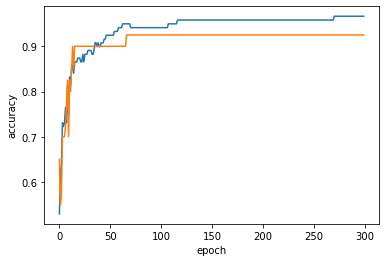

In [15]:
# 300번의 에포크 동안 기록한 훈련 세트와 테스트 세트의 점수를 그래프로

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

> 주황 : 테스트 , 파랑 : 훈련

> 100 전에는 과소, 100이후에는 거리가 더 벌어짐  $\to$ 100째 에포크가 적절해보임

In [17]:
# 100에 맞추고 다시 훈련
sc = SGDClassifier(loss = 'log' , max_iter=100 , tol=None ,random_state=42)
sc.fit(train_scaled , train_target)
print(sc.score(train_scaled , train_target))
print(sc.score(test_scaled , test_target))

0.957983193277311
0.925


> 정확도 상승!

# loss 매개변수

> loss 매개변수의 기본값 : hinge

> 힌지 손실 : 서포트 벡터 머신 이라 불리는 또다른 머신러닝 알고리즘을 위한 손실 함수

In [19]:
# 힌지 손실로 해보기
sc = SGDClassifier(loss = 'hinge' , max_iter=100 , tol=None ,random_state=42)
sc.fit(train_scaled , train_target)
print(sc.score(train_scaled , train_target))
print(sc.score(test_scaled , test_target))

0.9495798319327731
0.925


_________

# **마무리**

`*` 키워드로 끝내는 핵심 포인트

`-` **확률적 경사 하강법** : 훈련 세트에서 샘플 하나씩 꺼내 손실 함수의 경사를 따라 최적의 모델을찾는 알고리즘입니다. 샘플을 하나씩 사용하지 않고 여러 개를 사용하면 미니배치 경사 하강법이 됩니다. 한 번에 전체 샘플을 사용하면 배치 경사 하강법이 됩니다.

`-` **손실 함수** : 확률적 경사 하강법이 최적화할 대상입니다. 대부분의 문제에 잘 맞는 손실 함수가 이미 정의되어 있습니다. 이진 분류에는 로지스틱 회귀(또는 이진 크로스엔트로피) 손실함수를 사용합니다. 다중 분류에는 크로스엔트로피 손실 함수를 사용합니다. 회귀 문제에는 평균 제곱 오차 손실 함수를 사용합니다.


`-` **에포크** : 확률적 경사 하강법에서 전체 샘플을 모두 사용하는 한 번 반복을 의미합니다. 일반적으로 경사 하강법 알고리즘은 수십에서 수백 번의 에포크를 반복합니다.


`-` **라쏘** : 또 다른 규제가 있는 선형 회귀 모델입니다. 릿지와 달리 계수 값을 아예 0으로 만들 수도 있습니다.

`-` **하이퍼파라미터** : 머신러닝 알고리즘이 학습하지 않는 파라미터입니다. 이런 파라미터는 사람이 사전에 지정해야 합니다. 대표적으로 릿지와 라쏘의 규제 강도 alpha 파라미터입니다.

`-` **핵심 패키지**

`-` scikit-learn

> `1` SGDClassifier : 확률적 경사 하강법을 사용한 분류 모델을 만듭니다.\
\
max_iter 매개변수는 에포크 횟수를 지정합니다. 기본값은 1000입니다.\
\
loss 매개변수는 확률적 경사 하강법으로 최적화할 손실 함수를 지정합니다. 기본값은 서포트벡터 머신을 위한 ge' 손실 함수입니다. 로지스틱 회귀를 위해서는 'log'로 지정합니다.\
\
penalty 매개변수에서 규제의 종류를 지정할 수 있습니다. 기본값은 L2 규제를 위한 12' 입니다. L1 규제를 적용하려면 11'로 지정합니다. 규제 강도는 alpha 매개변수에서 지정합니다.기본값은 0,0001입니다.\
\
tol 매개변수는 반복을 멈출 조건입니다. tol 매개변수의 기본값은 0.001입니다.\
\
n_iter_no_change 매개변수에서 지정한 에포크 동안 손실이 tol 만큼 줄어들지 않으면 알고리즘이 중단됩니다. n_iter_no_change 매개변수의 기본값은 5입니다.
